In [2]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers


np.random.seed(1000)
# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [3]:
pickle_in = open("./resources/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)

pickle_in = open("./resources/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/Y_valid.pickle","rb")
Y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_valid= {X_valid.shape} Y_valid= {Y_valid.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (312, 512, 512, 3) Y_train= (312,)
X_valid= (180, 512, 512, 3) Y_valid= (180,)
X_test= (138, 512, 512, 3) Y_test= (138,)


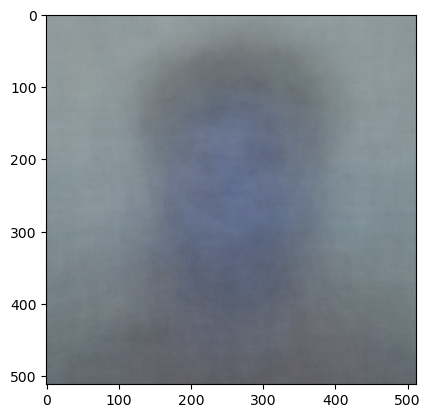

In [4]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))

In [5]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),


    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(39),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 96)      34944     
                                                                 
 activation (Activation)     (None, 126, 126, 96)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 63, 63, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 256)       2973952   
                                                                 
 activation_1 (Activation)   (None, 53, 53, 256)       0

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train_norm, y=Y_train, epochs=20, validation_data=(X_valid_norm, Y_valid), batch_size=10)

Epoch 1/20
32/32 [==============================] - 156s 4s/step - loss: 4.8376 - accuracy: 0.0737 - val_loss: 4878.6782 - val_accuracy: 0.0111
Epoch 2/20
32/32 [==============================] - 128s 4s/step - loss: 4.2316 - accuracy: 0.1090 - val_loss: 667.8502 - val_accuracy: 0.0111
Epoch 3/20
32/32 [==============================] - 130s 4s/step - loss: 4.0633 - accuracy: 0.1442 - val_loss: 166.6633 - val_accuracy: 0.0167
Epoch 4/20
32/32 [==============================] - 128s 4s/step - loss: 3.6254 - accuracy: 0.1763 - val_loss: 113.9557 - val_accuracy: 0.0167
Epoch 5/20
32/32 [==============================] - 146s 5s/step - loss: 3.8258 - accuracy: 0.1571 - val_loss: 49.0498 - val_accuracy: 0.0500
Epoch 6/20
32/32 [==============================] - 144s 5s/step - loss: 3.3903 - accuracy: 0.2147 - val_loss: 26.5009 - val_accuracy: 0.0722
Epoch 7/20
32/32 [==============================] - 143s 4s/step - loss: 3.4923 - accuracy: 0.1987 - val_loss: 22.6206 - val_accuracy: 0.0889
E

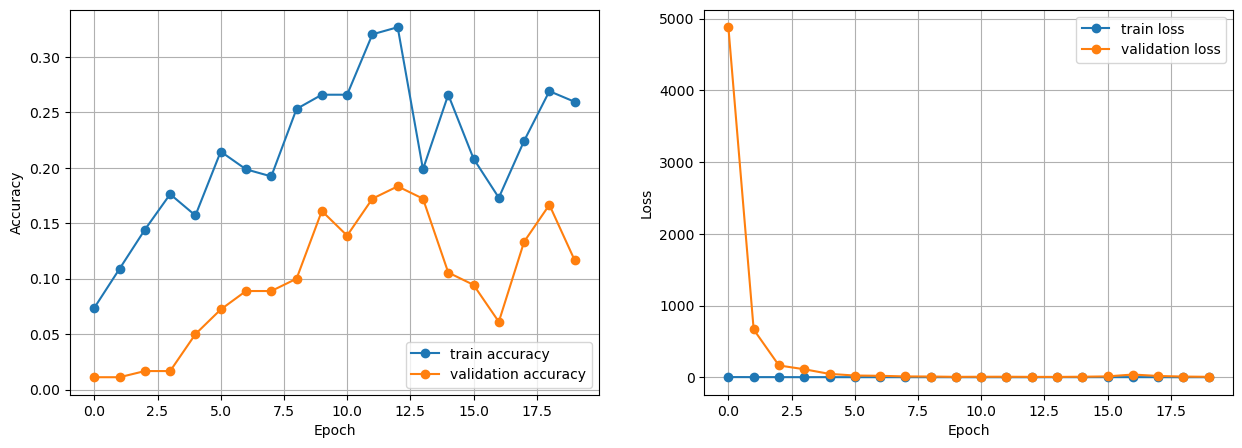

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

5/5 [==============================] - 14s 2s/step - loss: 9.2448 - accuracy: 0.1667

Test Accuracy: 0.1666666716337204

Test Loss: 9.244839668273926


In [11]:
tf.keras.models.save_model(model, './resources/alexnet_model.h5', overwrite=True, include_optimizer=True, save_format=None , signatures=None, options=None)